In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [2]:
ada_df = pd.read_csv('ADA-USD.csv')
ada_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-17,0.475183,0.502739,0.473478,0.487392,0.487392,8.727103e+08
1,2022-06-18,0.487367,0.494669,0.423419,0.456182,0.456182,1.214102e+09
2,2022-06-19,0.455970,0.487226,0.437213,0.484364,0.484364,1.050008e+09
3,2022-06-20,0.484403,0.507965,0.462886,0.492261,0.492261,1.096264e+09
4,2022-06-21,0.492270,0.509728,0.477318,0.479204,0.479204,1.018828e+09
...,...,...,...,...,...,...,...
361,2023-06-13,0.275054,0.287422,0.269893,0.274986,0.274986,3.194274e+08
362,2023-06-14,0.274990,0.276916,0.258221,0.263226,0.263226,2.448950e+08
363,2023-06-15,0.263234,0.265254,0.253406,0.261957,0.261957,2.563334e+08
364,2023-06-16,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ada_df.shape

(366, 7)

In [4]:
ada_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,0.391723,0.401373,0.381497,0.391139,0.391139,4.865624e+08
std,0.071531,0.074533,0.069559,0.071720,0.071720,3.014533e+08
min,0.244126,0.245987,0.230420,0.244140,0.244140,9.066601e+07
25%,0.345565,0.353987,0.332135,0.344585,0.344585,2.450024e+08
50%,0.383914,0.395019,0.377206,0.383643,0.383643,4.048863e+08
75%,0.447415,0.458882,0.434388,0.447186,0.447186,6.476752e+08
max,0.570386,0.593898,0.557554,0.570343,0.570343,1.601170e+09


In [5]:
ada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       365 non-null    float64
 2   High       365 non-null    float64
 3   Low        365 non-null    float64
 4   Close      365 non-null    float64
 5   Adj Close  365 non-null    float64
 6   Volume     365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [6]:
ada_df['Date'] = pd.to_datetime(ada_df.Date, errors='coerce')
ada_df.dropna(inplace=True)

In [7]:
ada_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
ada_df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
X = ['Open', 'High', 'Low' , 'Adj Close', 'Volume']
y = 'Close'

In [10]:
x_train, x_test, y_train, y_test = train_test_split(ada_df[X], ada_df[y], test_size=0.3, random_state=20)

In [11]:
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)

x_train shape :  (255, 5)
x_test shape :  (110, 5)


In [12]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [13]:
print(reg.coef_)
print(reg.intercept_)

[ 2.50227229e-15 -2.36309442e-15  3.46789005e-16  1.00000000e+00
  2.71214961e-26]
-2.7755575615628914e-16


In [14]:
predicted = reg.predict(x_test)
print(x_test)
print(predicted.shape)

         Open      High       Low  Adj Close       Volume
10   0.489558  0.507615  0.478620   0.485790  709992597.0
295  0.383626  0.390248  0.381087   0.385635  202832134.0
303  0.453266  0.457266  0.444282   0.451755  378398337.0
122  0.370271  0.375328  0.366599   0.372345  360241999.0
326  0.365794  0.369506  0.360900   0.363806  196752939.0
..        ...       ...       ...        ...          ...
205  0.277028  0.295218  0.274984   0.295218  391160515.0
93   0.487091  0.489621  0.444655   0.447186  677522389.0
267  0.315334  0.322794  0.304548   0.307327  444484034.0
117  0.390583  0.395019  0.378640   0.381300  470666876.0
344  0.362873  0.367230  0.362082   0.366774  106732324.0

[110 rows x 5 columns]
(110,)


In [15]:
past_df = pd.DataFrame({'Actual':y_test, 'predicted':predicted})
past_df.sort_index(inplace=True)

In [16]:
reg.score(x_test, y_test)

1.0

In [17]:
import math

In [18]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, predicted))

Mean Absolute Error :  4.087639317938076e-17


In [19]:
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, predicted))

Mean Squared Error :  3.3896367021215354e-33


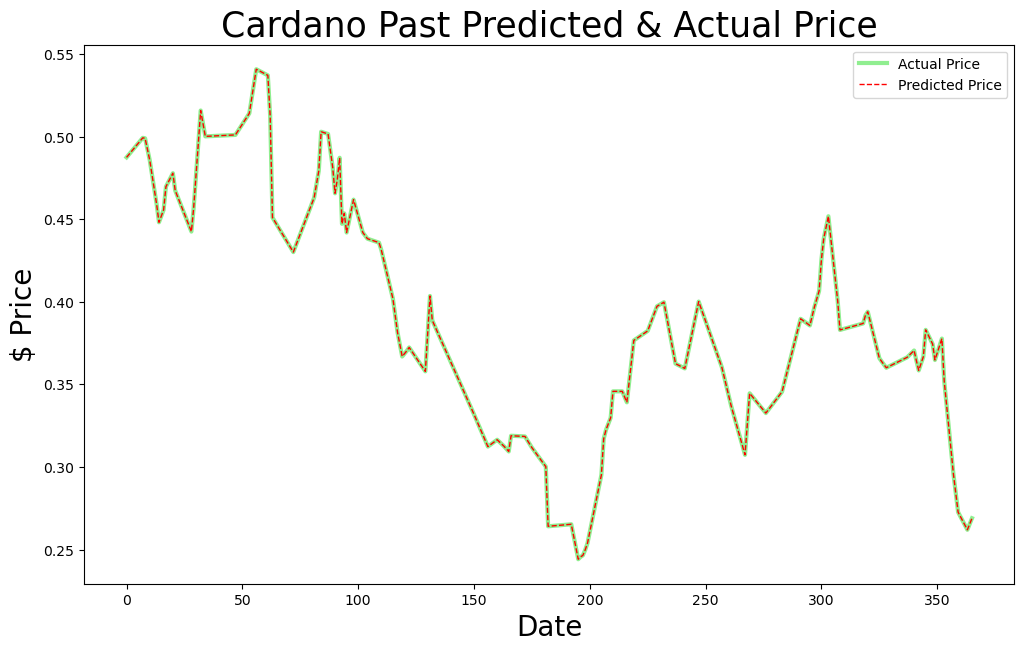

In [20]:
plt.figure(figsize = (12, 7))
plt.plot(past_df.index, past_df.Actual, color='lightgreen', lw=3, label="Actual Price")
plt.plot(past_df.index, past_df.predicted, color='red', linestyle = 'dashed', lw=1, label="Predicted Price")
plt.title("Cardano Past Predicted & Actual Price", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("$ Price", size=20)
plt.legend(loc="upper right")
plt.show()

In [21]:
future_set = ada_df.shift(periods=30).tail(30)

In [22]:
prediction = reg.predict(future_set[X])

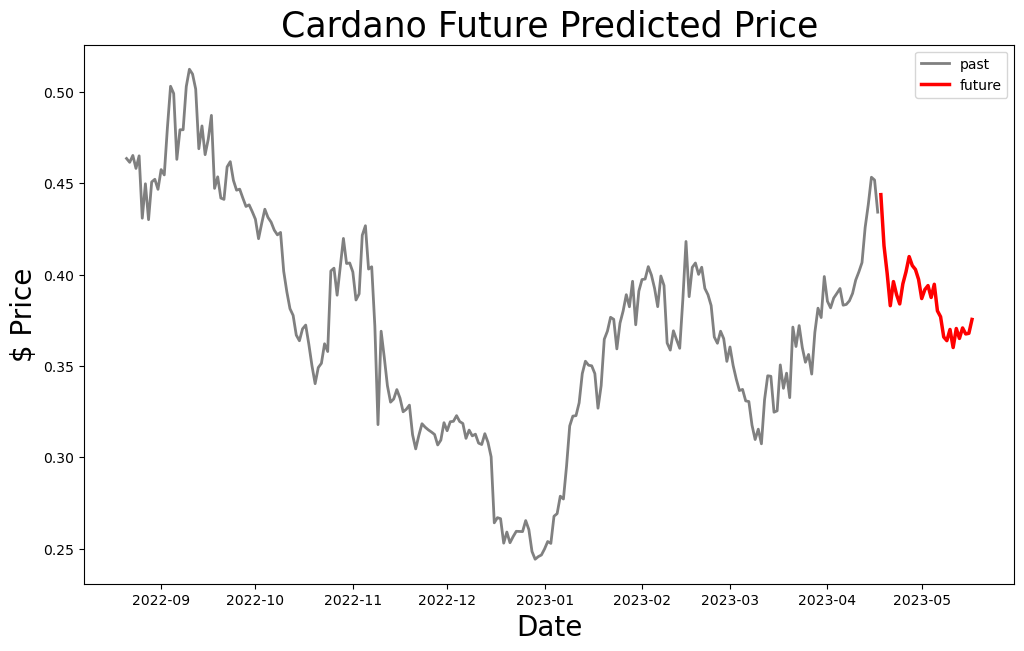

In [23]:
plt.figure(figsize = (12, 7))
plt.plot(ada_df["Date"][-300:-60], ada_df["Close"][-300:-60], color='gray', lw=2, label='past')
plt.plot(future_set["Date"], prediction, color='red', lw=2.5, label='future')
plt.title("Cardano Future Predicted Price", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("$ Price", size=20)
plt.legend(loc="upper right")
plt.show()